In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

nanshan_data = pd.read_csv('CLAIM.csv', encoding='big5')
nanshan_data.head() #print csv data

,CASE_NO,INSURED_SEX,AGE_RANK,TENURE,ILLNESS_CD,illness_code_desc,HOSP_CD,hospital_name,REIMB_AMT_K,settle_dt,CountNo,REIMB_AMT_5Y_K,RECENCY_YEAR,CountCovNo,Sum_afyp_K,EFFECTdate,TYPE_CODE,AFYP_K
0,1,F,02.21~40,16,A47202,橈骨骨折,DM0068,澄清綜合醫院（中港分院）,7,2017/10/25,NaN,NaN,16,1.0,18.0,NaN,NaN,NaN
1,2,M,03.41~60,16,A27902,冠狀動脈疾病,UM0011,新光醫院,18,2017/3/3,3.0,71.0,16,2.0,23.0,NaN,NaN,NaN
2,3,M,02.21~40,24,A29101,腦中風,UM0009,長庚醫院(林口、台北、桃園),5,2017/9/15,NaN,NaN,24,3.0,44.0,NaN,NaN,NaN
3,4,M,02.21~40,28,A36000,"攝護腺（前列腺）疾病（發炎,肥大等）",UM0098,台安醫院,0,2017/3/8,5.0,32.0,28,3.0,27.0,NaN,NaN,NaN
4,5,M,02.21~40,28,A48003,腕及手之脫臼，扭，拉，挫，捩傷,UM0100,博仁醫院,2,2017/7/6,7.0,133.0,27,4.0,44.0,NaN,NaN,NaN


以上是南山資料的csv讀檔，可以看出資料相當雜亂。

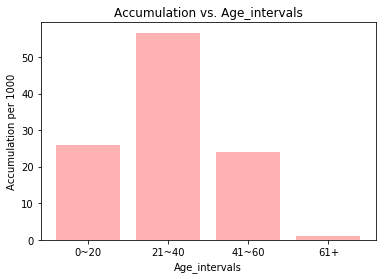

In [93]:
age_data = nanshan_data['AGE_RANK']
ages = []

for age in age_data:
    splits = age.split(".")
    ages.append(int(splits[0]))
range_0 = ages.count(1)
range_1 = ages.count(2)
range_2 = ages.count(3)
range_3 = ages.count(4)
ages_count = [range_0/1000, range_1/1000, range_2/1000, range_3/1000]
y_pos = np.arange(len(ages_count))
ticks = ('0~20','21~40', '41~60', '61+')
 
plt.bar(y_pos, ages_count, align='center', alpha=0.3, color='red')
plt.xticks(y_pos, ticks)
plt.ylabel('Accumulation per 1000')
plt.xlabel('Age_intervals')
plt.title('Accumulation vs. Age_intervals')
 
plt.show()

以上長條圖可以看出，在投保的客戶中，以21~40歲等青、壯年人口為主

In [89]:
gender_data = nanshan_data['INSURED_SEX']
gender_list = gender_data.tolist()
female = gender_list.count("F")
male = gender_list.count("M")
print("Nan-Shan life insurance co. have: {0:05d} female clints, and {1:05d} male clints! ".format(female,male))

Nan-Shan life insurance co. have: 56582 female clints, and 51029 male clints! 


以上資料可以知道，南山的客戶群中，男女比大約1:1，甚至有可能女性較多一些

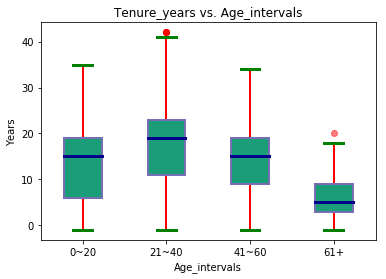

In [90]:
tenure_data = nanshan_data['TENURE']
tenure_list = tenure_data.tolist()
tenure_int = [int(i) for i in tenure_list]
box_data = [[],[],[],[]]
for i in range(len(ages)):
    if ages[i] == 1:
        box_data[0].append(tenure_int[i])
    elif ages[i] == 2:
        box_data[1].append(tenure_int[i])
    elif ages[i] == 3:
        box_data[2].append(tenure_int[i])
    else:
        box_data[3].append(tenure_int[i])   

fig = plt.figure()
ax = plt.subplot()
f = ax.boxplot(box_data,sym='r*',patch_artist=True)
plt.xticks([1, 2, 3, 4], ['0~20','21~40','41~60','61+'])
plt.ylabel('Years')
plt.xlabel('Age_intervals')
plt.title('Tenure_years vs. Age_intervals')
for box in f['boxes']:
    box.set( color='#7570b3', linewidth=2)
    box.set( facecolor = '#1b9e77' )
for whisker in f['whiskers']:
    whisker.set(color='r', linewidth=2)
for cap in f['caps']:
    cap.set(color='g', linewidth=3)
for median in f['medians']:
    median.set(color='DarkBlue', linewidth=3)
for flier in f['fliers']:
    flier.set(marker='o', color='y', alpha=0.5)
plt.show()


可以看出，在三個年齡分布區間中，21~40歲的客戶，平均擁有較高的年資

In [91]:
illness_data = nanshan_data['ILLNESS_CD']
illness_list = illness_data.tolist()
illness_label = []

for ill in illness_list:
    if not ill in illness_label:
        illness_label.append(ill)

hosp_data = nanshan_data['HOSP_CD']
hosp_list = hosp_data.tolist()
hosp_label = []

for hosp in hosp_list:
    if not hosp in hosp_label:
        hosp_label.append(hosp)

print("From Nan-Shan's data, thers are {0:03d} kinds of illness, and {1:04d} diffeient hospitals.".format(len(illness_label),len(hosp_label)))

From Nan-Shan's data, thers are 420 kinds of illness, and 1058 diffeient hospitals.


由以上的程式所擷取的資料可以發現，在南山給我們的資料裡，客戶有420種不同的疾病，而這些客戶也曾在1058間不同的醫院就診。

In [92]:
illness_count = []
for label in illness_label:
    illness_count.append(illness_list.count(label))
combine = []
for i in range(len(illness_label)):
    combine.append([illness_count[i],illness_label[i]])
sort_list=sorted(combine,key=lambda x: x[0],reverse=True)
top5_illness=[sort_list[i][1] for i in range(5)]
top5_count = [sort_list[i][0]/len(illness_list)*100 for i in range(5)]
top5_idx = []
for ill in top5_illness:
    top5_idx.append(illness_list.index(ill))
illname_data = nanshan_data['illness_code_desc']
top5_name = []
for i in top5_idx:
    top5_name.append(illname_data[i])
dic = pd.DataFrame.from_dict(dict(zip(top5_name,top5_count)),orient='index',columns=['%'])
dic.head()

,%
乳房之惡性腫瘤,3.190194
腰及背部之脫臼，扭，拉，挫，捩傷,3.141872
肩及上臂之脫臼，扭，拉，挫，捩傷,3.024784
踝及足之脫臼，扭，拉，挫，捩傷,3.006198
手之外傷,2.959735


由以上表格可知道，在420種疾病中，前五名的疾病與比例為表格所示，除了乳房之惡性腫瘤外，基本上為常見的傷病。